In [1]:
import sys
sys.path.append("../tools")
%run import_modules.py

## Machine Learning
#### Tarique Hasheem

***

## Table of Content

* Understanding the DataSet
* Outlier Investigation
	* A Word on Outliers
* New Features
* Feature Selection
	* Feature Scaling
* New Feature Testing
* Splitting the Data
    * Random Forest with Engineered Feature
        * Shuffle, Split, Stratified Shuffle Split,  Cross Validation
        * Shuffle Split
        * Stratified Shuffle Split
        * Engineered Feature: Split Summary
        * Feature Importance With Engineered Feature
        * Summary: With Engineered Feature
    * Random Forest Without Engineered Feature
        * Shuffle Split
        * Stratified Shuffle Split
        * Summary: Engineered Feature Performance
* Additional Classifiers
	* Gaussian
	* SVC With Engineered Feature
    * SVC Without Engineered Feature
* Feature Summary
* Tune an Algorithm
	* Gradient Boosting Classifier
* Validate and Evaluate
	* Define Parameter Tuning
	* Define Evaluate
	* Define Validate
	* Defining Precision and Recall


***

### UNDERSTANDING THE DATASET


The goal of the project was to identify 'persons of interest' in 
the Enron case. Enron was a large energy corporation and extremely 
successful until its luck ran out in the late 90's. The company 
eventually filed for BK and a number of its executives were 
charged with fraud.

The dataset has three groups of features, (i) financial features, 
(ii) email features, and (iii) POI labels.  The goal is to see if
machine learning can pick out persons of interest from instances and
their respected features.  

Yes, the dataset had outliers.  One way to handle outliers was to allow
Pandas to do the heavy lifting.  A clear explanation of the outliers
process has been documented in the html file for those interested in 
taking a peak.  

To understand the dataset we will use the Pandas libray.  Pandas will allow us to import the pickle file, then create a Pandas DataFrame to help us answer:

* total number of data points
* allocation across classes (POI/non-POI)
* number of features used
* are there features with many missing values

Working with our data set will be less of a task if we take advatage of Pandas.  The code below will:

* read pickle file into Pandas
* convert the imported pickle file into a Pandas dataframe
* save the dataframe into a csv for better manipulation of data
* read the csv file into a dataframe

I know its a process however Pandas and csv files are like a match made in data heaven somewhere.

In [2]:
import pandas as pd
pikl = pd.read_pickle('final_project_dataset.pkl')
pdict = pd.DataFrame.from_dict(pikl, orient='index')
pdict.to_csv('datafile_1')
poi_data = pd.read_csv('datafile_1')
poi = poi_data

We can now address some of the more pressing question about the data set such as shape and data types in columns

In [3]:
print 'The shape of our data:', poi.shape
print '\nThere are 146 instances and 21 features (1 out of 21 features is for indexing column in pandas).'

The shape of our data: (146, 22)

There are 146 instances and 21 features (1 out of 21 features is for indexing column in pandas).


In [4]:
print 'What sort of data types:\n\n', poi.dtypes

What sort of data types:

Unnamed: 0                    object
salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
exercised_stock_options      float64
bonus                        float64
restricted_stock             float64
shared_receipt_with_poi      float64
restricted_stock_deferred    float64
total_stock_value            float64
expenses                     float64
loan_advances                float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
director_fees                float64
deferred_income              float64
long_term_incentive          float64
email_address                 object
from_poi_to_this_person      float64
dtype: object


In [5]:
print 'Number of POI in dataset:', len(poi[poi.poi == True])

Number of POI in dataset: 18


Simply printing out the frist 3 rows of our data set we clearly see its quite ugly. Ther are missing values in virtually all fields. It's not a pretty data set for machine learning by any stretch of the imagination, and luckily we have Pandas, Python and Sklearn to help us fix it.

In [6]:
poi[:3]

,Unnamed: 0,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
0,ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,...,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
1,BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,...,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0


***

### OUTLIER INVESTIGATION

Response to outliers in the data set.

Lets plot the salary column and see if we can visually spot any outliers.

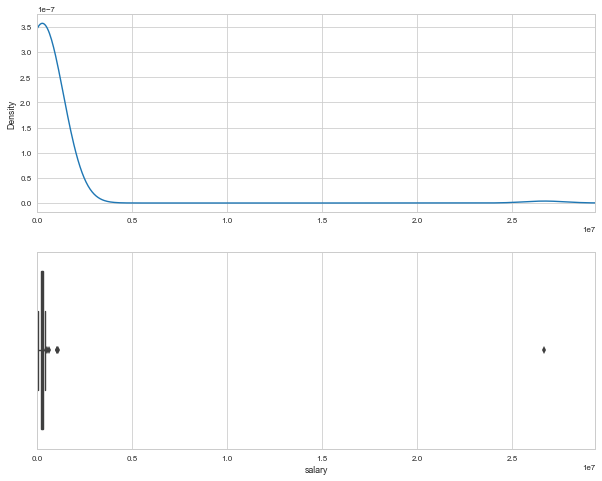

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

MAX_ROWS = 150
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style('whitegrid')
sns.set_context('paper')

i = 'salary'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(poi[i].min(), poi[i].max()*1.1)

ax = poi[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(poi[i].min(), poi[i].max()*1.1)
sns.boxplot(x=poi[i])



We can clearly see there is one outlier draging all the way to the right.  I have a a feeling is the total row element of salary feature.  We can simply delete the 'TOTAL' row from each data frame column.  Lets first find the index for the row with aggregate total values called 'TOTAL'.

In [8]:
poi.iloc[-17:-14]

,Unnamed: 0,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
129,TILNEY ELIZABETH A,247338.0,460.0,NaN,399393.0,591250.0,300000.0,576792.0,379.0,NaN,1168042.0,NaN,NaN,19.0,152055.0,11.0,False,NaN,-575000.0,275000.0,elizabeth.tilney@enron.com,10.0
130,TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,5235198.0,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN
131,UMANOFF ADAM S,288589.0,111.0,NaN,1130461.0,NaN,788750.0,NaN,41.0,NaN,NaN,53122.0,NaN,18.0,NaN,0.0,False,NaN,NaN,NaN,adam.umanoff@enron.com,12.0


Index 130 of our data frame can cause all sorts of outliers.  Lets remove it.

In [9]:
poi = poi.drop([130])

In [10]:
print "Voila! We can verify index 130 has been deleted.\n\n", poi.iloc[-17:-14, 0:1]

Voila! We can verify index 130 has been deleted.

             Unnamed: 0
128     THORN TERENCE H
129  TILNEY ELIZABETH A
131      UMANOFF ADAM S


We have a few more outliers to drop.  Row 127 is Travel Agency In The Park.   Also row 84 Lockhart Eugene E with all NaN values.  

In [11]:
poi = poi.drop([127])
poi = poi.drop([84])

Lets run info on our dataframe and look for outliers in the columns.

In [12]:
poi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 145
Data columns (total 22 columns):
Unnamed: 0                   143 non-null object
salary                       94 non-null float64
to_messages                  86 non-null float64
deferral_payments            38 non-null float64
total_payments               123 non-null float64
exercised_stock_options      101 non-null float64
bonus                        81 non-null float64
restricted_stock             109 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    17 non-null float64
total_stock_value            125 non-null float64
expenses                     94 non-null float64
loan_advances                3 non-null float64
from_messages                86 non-null float64
other                        91 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          143 non-null bool
director_fees                16 non-null float64
deferred_inc

What a terribly pretty dataset.  Any column with less than 50 non-null will be deleted.  These skew the data.  

* Unnamed: 0  
* deferral_payments  
* restricted_stock_deferred  
* loan_advances  
* director_fees  
* email_address  
* other  
* total_payments  

In [13]:
poi = poi.drop('Unnamed: 0', axis=1)   
poi = poi.drop('deferral_payments', axis=1)   
poi = poi.drop('restricted_stock_deferred', axis=1)   
poi = poi.drop('loan_advances', axis=1)   
poi = poi.drop('director_fees', axis=1)   
poi = poi.drop('email_address', axis=1)   
poi = poi.drop('other', axis=1)   
poi = poi.drop('total_payments', axis=1)

Looking at poi.info() below we see a much better looking dataset.  The reason why it was necessary to drop the columns with less than 50 non-null values is because it skews our data.  

It's like saying if 3 friends always hang around each other they are as goofy as the Three Stooges.  So if you don't want to be labeled goofy like the Stooges don't be in groups of 3.  We all know that not all groups of 3 are goofy, just look at the Threes Company, or three on three basketball.  Labeling anything with limited data is in itself goofy.

In [14]:
poi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 145
Data columns (total 14 columns):
salary                     94 non-null float64
to_messages                86 non-null float64
exercised_stock_options    101 non-null float64
bonus                      81 non-null float64
restricted_stock           109 non-null float64
shared_receipt_with_poi    86 non-null float64
total_stock_value          125 non-null float64
expenses                   94 non-null float64
from_messages              86 non-null float64
from_this_person_to_poi    86 non-null float64
poi                        143 non-null bool
deferred_income            48 non-null float64
long_term_incentive        65 non-null float64
from_poi_to_this_person    86 non-null float64
dtypes: bool(1), float64(13)
memory usage: 15.8 KB


We still have one slight issue.  We have NaN values all over our data.  Lets just simply replace all NaN with zeros.  We can see below that all our columns have 143 non-null values.

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # lets not print in scientific notation.
poi = poi.fillna(0)
poi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 145
Data columns (total 14 columns):
salary                     143 non-null float64
to_messages                143 non-null float64
exercised_stock_options    143 non-null float64
bonus                      143 non-null float64
restricted_stock           143 non-null float64
shared_receipt_with_poi    143 non-null float64
total_stock_value          143 non-null float64
expenses                   143 non-null float64
from_messages              143 non-null float64
from_this_person_to_poi    143 non-null float64
poi                        143 non-null bool
deferred_income            143 non-null float64
long_term_incentive        143 non-null float64
from_poi_to_this_person    143 non-null float64
dtypes: bool(1), float64(13)
memory usage: 15.8 KB


We've trimmed our dataset from 22 columns to 14.

Great, our outliers should be good to go for now.

Lets replot our 'salary' column and see if we have a more infromative graph than the one above.  

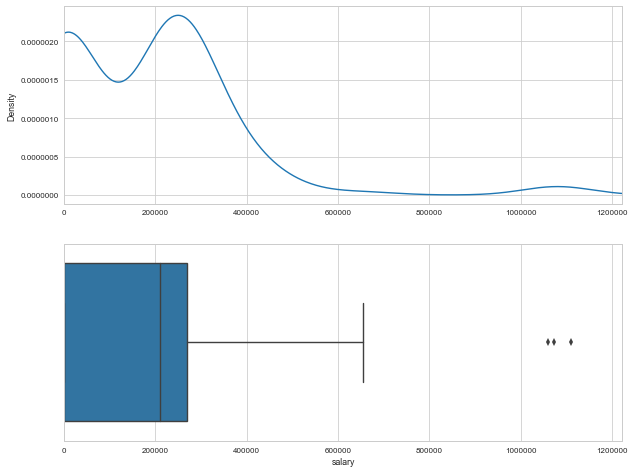

In [16]:
MAX_ROWS = 150
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style('whitegrid')
sns.set_context('paper')

i = 'salary'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(poi[i].min(), poi[i].max()*1.1)

ax = poi[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(poi[i].min(), poi[i].max()*1.1)
sns.boxplot(x=poi[i])

The plot is much better.  We see we have a few outliers with salaries greater than $1MM. I suspect the CEO's of the organization were the recipients of these greater amounts...the apple rarely falls to far from the tree.

### A WORD ON OUTLIERS

In the examples above we removed some of the outliers but our data is still not
ready.  

Outliers are not so easily removed as with our examples from above.  What we've
done so far is clean up the data slightly.  During the course work we we're
presented a best practice to remove outliers and by simply:

* train our data
* remove points with largest residual error  
	* (actual_feature_values - classifier_prediction )^2
* train again

In other words we need to fit our classifier, then plot the output to visually
check for any outliers.  Once an outliers has been identified simply remove the 
element from the data set.  It's very important to understand removing outliers,
NaN, or using place holders such as zeros will undoubtedly affect your model.  
Its advised to be cautious.

Moreover machine learning algorithms may have built in features to deal with 
outliers.  For example the RANSAC algorithm.  What makes this algorithm 
interesting is its ability to split the data into inlier and outliers then makes
a prediction based on inlier.  In some situations this may serve better than manually seeking 
outliers and removing them as we do below.


r-squared score: 0.0514514327766

Scores after cleaning outliers:

r-squared score: 0.208028141854
[[ 3.64870283]] [[ 5.06950517]]

Linear Regression score:
0.989492389648

RANSAC score:
0.839052273621 



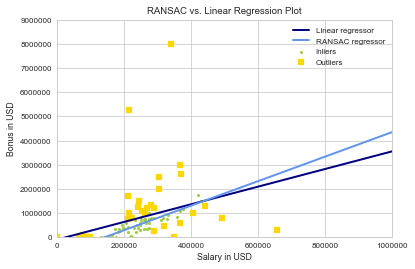

In [17]:
%run outlierRemove.py

We can see our r-score has improved after running our outlier removal function.  The RANSAC vs. Linear Regression Plot is quite fascinating as-well.

***

### NEW FEATURES

Now lets create a new feature 'fraction of messages to poi'.  In order to justify the new feature lets understand what it accomplishes.  It takes the number of emails sent from a person to a poi and divides it by total number of from messages.  In other words, is it possible to detect poi based on the frequency of emails received?

In [18]:
# lets keep the integrity of our poi dataframe just in case we goof up.
df_with_newFeature = poi

# creating new column in our data frame for our new feature
df_with_newFeature['fraction_of_messages_to_poi'] = df_with_newFeature.from_this_person_to_poi / df_with_newFeature.from_messages 

# make sure all NaN in the new column are replaced with zeros
df_with_newFeature = df_with_newFeature.fillna(0)

# new csv file
df_with_newFeature.to_csv('datafile_with_newFeature.csv')
df_with_newFeature.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 145
Data columns (total 15 columns):
salary                         143 non-null float64
to_messages                    143 non-null float64
exercised_stock_options        143 non-null float64
bonus                          143 non-null float64
restricted_stock               143 non-null float64
shared_receipt_with_poi        143 non-null float64
total_stock_value              143 non-null float64
expenses                       143 non-null float64
from_messages                  143 non-null float64
from_this_person_to_poi        143 non-null float64
poi                            143 non-null bool
deferred_income                143 non-null float64
long_term_incentive            143 non-null float64
from_poi_to_this_person        143 non-null float64
fraction_of_messages_to_poi    143 non-null float64
dtypes: bool(1), float64(14)
memory usage: 16.9 KB


***

### FEATURE SELECTION

#### FEATURE SCALING

Lets go ahead and scale our data. Scaling is ideal if one wishes to obtain 
good results. In simpler terms its much like baking cookies. If the ingredients 
call for 0.91 kilograms of chocolate chip, and 9 tea spoons of butter you'd 
be wise to scale both of these measurements to equal measurement types. More technically scaling 
can be thought of as transforming features into z-scores.


*** _As a reminder some algorithms work better without scaling.  Such as decisions tress.  Decision trees_ 

To better help us manage our fits and bits, we'll use pipeline to construct a classifier.

In [19]:
df =  pd.read_csv('datafile_with_newFeature.csv', index_col=0)
df.head(3)

,salary,to_messages,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,from_this_person_to_poi,poi,deferred_income,long_term_incentive,from_poi_to_this_person,fraction_of_messages_to_poi
0,201955.00,2902.00,1729541.00,4175000.00,126027.00,1407.00,1729541.00,13868.00,2195.00,65.00,False,-3081055.00,304805.00,47.00,0.03
1,0.00,0.00,257817.00,0.00,0.00,0.00,257817.00,3486.00,0.00,0.00,False,0.00,0.00,0.00,0.00
2,477.00,566.00,4046157.00,0.00,1757552.00,465.00,5243487.00,56301.00,29.00,0.00,False,-5104.00,0.00,39.00,0.00


In [20]:
from sklearn import feature_extraction
def one_hot_dataframe(data, cols, replace=False):
    # takes in dataframe and uses DictVectorizer to convert POI into 
    # 1 and 0 instead of True/False.

    vec = feature_extraction.DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData)

In [21]:
df_w_feat, df_w_feat_n = one_hot_dataframe(df, ['salary', 'to_messages', 
                       'exercised_stock_options',
                       'bonus','restricted_stock', 
                       'shared_receipt_with_poi', 
                       'total_stock_value','expenses', 
                       'from_messages', 'from_this_person_to_poi', 
                       'poi','deferred_income', 
                       'long_term_incentive', 
                       'from_poi_to_this_person',
                       'fraction_of_messages_to_poi'], replace=True)

In [22]:
data_target = df_w_feat['poi']
data = df_w_feat.drop(['poi'], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 145
Data columns (total 14 columns):
bonus                          143 non-null float64
deferred_income                143 non-null float64
exercised_stock_options        143 non-null float64
expenses                       143 non-null float64
fraction_of_messages_to_poi    143 non-null float64
from_messages                  143 non-null float64
from_poi_to_this_person        143 non-null float64
from_this_person_to_poi        143 non-null float64
long_term_incentive            143 non-null float64
restricted_stock               143 non-null float64
salary                         143 non-null float64
shared_receipt_with_poi        143 non-null float64
to_messages                    143 non-null float64
total_stock_value              143 non-null float64
dtypes: float64(14)
memory usage: 21.8 KB


### NEW FEATURE TESTING 

Decision tree algorithms are used to train datasets but they over fit.  To combat over fitting robust algorithms such as Random Forest or Gradient Boost should be considered.

A decision tree is usually a single tree and while pruning techniques are essential they don't quite remedy over fitting.  If we could build multiple decision trees in randomness, each tree would likely over fit in a different way.  If we then take the average of these results we'll have a much better performing algorithm, hence the use of Random Forest.  Each tree will have an acceptable rate of predicting the target and will be different from the rest by simply building each tree randomly.

We'll use Random Forest to train our dataset and determine what affects our new feature, _fraction of messages to poi_ , has.  We'll test two models one with the feature and one without this feature.

* n_estimators = number of trees to build

* max_featrues = each node randomly selects a subset of the features and it looks for the best possible test involving one of these features.  


### SPLITTING THE DATA

Splitting our data is an extremely important step, especially in real world datasets.  If we neglect to split our data we're effectively fooling ourselves with very optimistic results. In other words, we over fit our data by training and test on the same data set.  The algorithm will cheat in a sense and remember how the data fit including any noise.  Therefore when testing on the training set you're virtually predict at 100% accuracy.  

We can avoid over fitting by splitting our data into training and testings sets.  In real world applications as suggested in Kuhn and Johnson book, Applied Predictive Modeling, a validation set should also be considered.  The validation portion will be used for parameter tuning via GridSearchCV.

In the following exercise I've split our data into training, testing, and validation sets.  Although we're not using the validation set, its good practice to become familiar with managing the task.

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data_target, random_state=0)                          

# split train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1)

We can see from the print out below how our data has been split into training, testing, and validation sets.

In [24]:
print 'size of training set:' , X_train.shape
print 'size of test set: ', X_test.shape
print 'size of validation set:' , X_val.shape

size of training set: (80, 14)
size of test set:  (36, 14)
size of validation set: (27, 14)


### RANDOM FOREST WITH ENGINEERED FEATURE

Below we've fit our classifier with the dataset containing the feature we created.  Lets check out its score. 

In [25]:
forest = RandomForestClassifier(n_estimators=10, random_state=2)     
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.86111111111111116

### SHUFFLE SPLIT, STRATIFIED SHUFFLE SPLIT, CROSS VALIDATION

Next we'll put in practice Shuffle Split and cross validation.  Shuffle Split is a great way to randomly shuffle and split our dataset.  The drawback is there is no guarantee that all folds in our cross validation will be different.  This is important to note with our limited data set.  

To combat this limitation we'll also use Stratified Shuffle Split.  This will make sure that folds in our cross validation will have a scaled balance between our two classes, or "by preserving the percentage of samples for each class," (scikit-learn.org).

Once we've constructed Shuffle Split and Stratified Shuffle Split we're going to use cross validation to do the heaving lifting.  In a nut shell cross validation splits our dataset into folds in order to train and test on each split.  This allows us to use more of of the data for training and testing when compared to a simple train_test_split scheme.

### SHUFFLE SPLIT

In [26]:
from sklearn.model_selection import ShuffleSplit

# fit our classifier
forestCV = RandomForestClassifier(n_estimators=10, random_state=2)
forestCV.fit(X_train, y_train)

# split data using ShuffleSplit 
kfold = ShuffleSplit(random_state=9)

# use cross valiidation 
score = cross_val_score(forestCV, data, data_target, cv=kfold)


print '\nmean score: ', score.mean()
print '\nn_features: ', forestCV.n_features_
print '\nfeature importance sum: ', forestCV.feature_importances_.sum()



mean score:  0.873333333333

n_features:  14

feature importance sum:  1.0


### STRATIFIED SHUFFLE SPLIT

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

forestCV = RandomForestClassifier(n_estimators=10, random_state=2)
forestCV.fit(X_train, y_train)

kfold = StratifiedShuffleSplit(random_state=9)

score = cross_val_score(forestCV, data, data_target, cv=kfold)

#print 'SCORES: \n', score
print '\nmean score: ', score.mean()
print 'n_features: ', forestCV.n_features_
print 'X_train size:', X_train.shape[0]


mean score:  0.833333333333
n_features:  14
X_train size: 80


### ENGINEERED FEATURE: SPLIT SUMMARY

We immediately notice our mean score has gone down with Stratified Shuffle Split which is a reasonable indicator we may have been over fitting by simply using Shuffle Split.  We're still using the limited training set because of our three way split earlier into training, testing, and validation.  If this were a real world application we would change the data splits into training and validation only.  The training set will be cross validated as a test set using Stratified Shuffle Split and when tunning our parameters we'd use the validation set.  But for now we've conceptually cleared up some of the muggy waters.

### FEATURE IMPORTANCE:  WITH ENGINEERED FEATURE

Lets shift gears and print how Random Forest ranked the features and how the feature we created stacks up against the rest.

This is muli-porcedural task:

1. reshape the array
2. create new pandas dataframe to see the feature rankings and column names.
3. sort feature_importance and see how our feature is ranked

In [28]:
print forestCV.feature_importances_.shape
print data.columns.shape

(14,)
(14,)


In [29]:
# lets reshape our feature_importance array from rows into columns
a = np.reshape(forestCV.feature_importances_, (-1, 14))
a

array([[ 0.06287068,  0.04587532,  0.07922624,  0.08744912,  0.16138383,
         0.02021006,  0.04599399,  0.00979909,  0.06757843,  0.04533603,
         0.06490477,  0.02298344,  0.03716383,  0.24922518]])

In [30]:
# create new dataframe to visualize feature_importance and their respected 
# column names
df_feat_importanceDATA = pd.DataFrame(a, columns=data.columns)
df_feat_importanceDATA

,bonus,deferred_income,exercised_stock_options,expenses,fraction_of_messages_to_poi,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_stock_value
0,0.06,0.05,0.08,0.09,0.16,0.02,0.05,0.01,0.07,0.05,0.06,0.02,0.04,0.25


In [31]:
# classification report
pred  = forestCV.predict(X_train)
print classification_report(y_train, pred, target_names=['not poi', 'poi'])


             precision    recall  f1-score   support

    not poi       0.99      1.00      0.99        69
        poi       1.00      0.91      0.95        11

avg / total       0.99      0.99      0.99        80



In [32]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, pred)
print '\nCONFUSION MATRIX\n', confusion
print '\nUNIQUE PREDICTED LABELS: ', np.unique(pred)


CONFUSION MATRIX
[[69  0]
 [ 1 10]]

UNIQUE PREDICTED LABELS:  [ 0.  1.]


### SUMMARY: WITH ENGINEERED FEATURE

The feature we created has a feature_importance score of 0.16 and only total_stock_value is ranked higher at 0.25 in feature_importance.  

If we consider how the algorithm performed pre and post spits there are differences in scores.  In other words Shuffle Split performed slightly better than Stratified Shuffle Split and that was expected.  Stratified Shuffle Split will do a better job at splitting our data with a scaled balance between our two classifiers and in doing so it will perfom slightly lower than Shuffle Split.

***

### RANDOM FOREST WITHOUT ENGINEERED FEATURE

Now we're going to drop our engineered feature and run the exact same steps from above.  This will allow us to the gauge the performance of our algorithm and understand if our featured engineer helps our algorithm score higher or lower.

In [33]:
# dropping feature
data2 = data.drop(['fraction_of_messages_to_poi'], axis=1)

In [34]:
# split data into train+validation set and test set
X_train, X_test, y_train, y_test = train_test_split(data2, data_target, random_state=0)                          

# split train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1)

In [35]:
print 'size of training set:' , X_train.shape
print 'size of test set: ', X_test.shape
print 'size of validation set:' , X_val.shape

size of training set: (80, 13)
size of test set:  (36, 13)
size of validation set: (27, 13)


In [36]:
forest = RandomForestClassifier(n_estimators=10, random_state=2)     
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.86111111111111116

### SHUFFLE SPLIT

In [37]:
from sklearn.model_selection import ShuffleSplit

# fit our classifier
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train)

# split data using ShuffleSplit 
kfold = ShuffleSplit(random_state=9)

# use cross valiidation 
score = cross_val_score(forest, data2, data_target, cv=kfold)


print '\nmean score: ', score.mean()
print '\nn_features: ', forest.n_features_
print '\nfeature importance sum: ', forest.feature_importances_.sum()



mean score:  0.886666666667

n_features:  13

feature importance sum:  1.0


### STRATIFIED SHUFFLE SPLIT

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

forestCV = RandomForestClassifier(n_estimators=10, random_state=2)
forestCV.fit(X_train, y_train)

kfold = StratifiedShuffleSplit(random_state=9)

score = cross_val_score(forestCV, data2, data_target, cv=kfold)

#print 'SCORES: \n', score
print '\nmean score: ', score.mean()
print 'n_features: ', forestCV.n_features_
print 'X_train size:', X_train.shape[0]


mean score:  0.846666666667
n_features:  13
X_train size: 80


In [39]:
print 'forest feature', forest.feature_importances_.shape
print 'data feature', data2.columns.shape

forest feature (13,)
data feature (13,)


In [40]:
a = np.reshape(forest.feature_importances_, (-1,13)) 
a

array([[ 0.04764108,  0.05731841,  0.26571729,  0.11430323,  0.00690877,
         0.07624029,  0.06042537,  0.06582814,  0.01126854,  0.05261422,
         0.06460013,  0.0400622 ,  0.13707233]])

In [41]:
a = pd.DataFrame(a, columns=data2.columns)
a

,bonus,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_stock_value
0,0.05,0.06,0.27,0.11,0.01,0.08,0.06,0.07,0.01,0.05,0.06,0.04,0.14


In [42]:
pred  = forest.predict(X_train)
print classification_report(y_train, pred, target_names=['not poi', 'poi'])


             precision    recall  f1-score   support

    not poi       0.96      1.00      0.98        69
        poi       1.00      0.73      0.84        11

avg / total       0.96      0.96      0.96        80



In [43]:
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_train, pred)
    print '\nCONFUSION MATRIX\n', confusion
    print '\nUNIQUE PREDICTED LABELS: ', np.unique(pred)


CONFUSION MATRIX
[[69  0]
 [ 3  8]]

UNIQUE PREDICTED LABELS:  [ 0.  1.]


### SUMMARY: ENGINEERED FEATURE PERFORMANCE

We notice our algorithm performs slightly better without our engineered feature.  However in precision scores our engineered featured scored higher.

With engineered feature:

* 0.87 Shuffle Split
* 0.83 Stratified Shuffle Split
* 0.99 Precision score

Without engineered feature:

* 0.88 Shuffle Split
* 0.84 Stratified Shuffle Split
* 0.96 Precision score

***

### ADDITIONAL CLASSIFIERS

### GAUSSIAN

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
score = cross_val_score(clf, data, data_target, cv=3)
print score

[ 0.79166667  0.8125      0.89361702]


### SVC WITH ENGINEERED FEATURE

In [45]:
def featureNames_svc(n, X, y, param_grid, cv_n):
    # X = dataframe
    # y = label
    
    # split data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

    # scaler, selector, classifier, pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.feature_selection import SelectKBest
    from sklearn.svm import SVC
    from sklearn.pipeline import Pipeline 



    # create pipeline
    estimator = [('scaler', StandardScaler()), ('selector', SelectKBest(k=n)), ('svc', SVC())] 
    pipe = Pipeline(estimator)
    pipe.fit(X_train, y_train)
    

    # using get_support method for feature names to be stored in variable
    names = X.columns.values[pipe.named_steps['selector'].get_support()]
    
    # using get support method for scores to be stored in variable
    scores = pipe.named_steps['selector'].scores_[pipe.named_steps['selector'].get_support()]
    
    # sip feature names and scores
    names_scores = list(zip(names, scores))
    
    # create new dataframe from zipped list 
    ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Feat_Score'])
    # sort dataframe
    ns_df_sorted = ns_df.sort_values(['Feat_Score', 'Feat_names'], ascending = [False, True])
    
    # cross validate
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv_n)
    grid.fit(X_train, y_train)
    
    print 'PIPE STEPS \n\n', pipe.steps
    print '\n\nSELECTED FEATURES\n\n', ns_df_sorted
    print '\n\nSCORE', pipe.score(X_test, y_test)
    
    print '\n\nBEST CROSS-VALIDATION ACCURACY: {:.5f}'.format(grid.best_score_)
    print '\n\nTEST SET SCORE: {:.5f}'.format(grid.score(X_test, y_test))
    print '\n\nBEST PARAMETERS: {}'.format(grid.best_params_)
    #print '\n\nCOEFFICIENTS:\n{}'.format(grid.best_estimator_.named_steps['svc'].coef_)
    
    print '\n\n'

In [46]:
param_grid = param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                           
                          }

pipe = featureNames_svc(5, data, data_target, param_grid, 5)
pipe


PIPE STEPS 

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=5, score_func=<function f_classif at 0x11ab436e0>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


SELECTED FEATURES

                    Feat_names  Feat_Score
1      exercised_stock_options       23.16
4            total_stock_value       23.15
0                        bonus       20.06
2  fraction_of_messages_to_poi       16.55
3             restricted_stock       12.93


SCORE 0.861111111111


BEST CROSS-VALIDATION ACCURACY: 0.87850


TEST SET SCORE: 0.86111


BEST PARAMETERS: {'svc__C': 0.001}





#### _The SVC classifier above includes our engineered feature.  Our engineered feature is in top 5 KBest._

### SVC WITHOUT ENGINEERED FEATURE

In [47]:
param_grid = param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                           
                          }
# without engineered feature
pipe = featureNames_svc(5, data2, data_target, param_grid, 5)
pipe

PIPE STEPS 

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=5, score_func=<function f_classif at 0x11ab436e0>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


SELECTED FEATURES

                Feat_names  Feat_Score
1  exercised_stock_options       23.16
4        total_stock_value       23.15
0                    bonus       20.06
2         restricted_stock       12.93
3                   salary       11.04


SCORE 0.861111111111


BEST CROSS-VALIDATION ACCURACY: 0.87850


TEST SET SCORE: 0.86111


BEST PARAMETERS: {'svc__C': 0.001}





### FEATURE SUMMARY

Pipleline allowed us to scale our features then we used SelectKBest to find the top 5 features.  I then ran:

* GridSearchCV

on the C parameter.  The results are shown in the SELECTED FEATURES output above.  We notice in the SELECTED FEATURES output that our engineered feature is in the top 5 of KBest.  

For tuning an algorithm section I've decided to build a Gradient Boosting Classifier.  

## TUNE AN ALGORITHM
### Gradient Boosting Classifier

For the first iteration I'll only split the data into training and testing sets.  The second I'll split the data into training, testing, and validation.  I anticipate the first iteration to have better scores simply because of more data allocated.

In [48]:
data3 = data[['bonus', 'salary', 'total_stock_value', 'exercised_stock_options', 'restricted_stock']]

In [49]:
def treerunner2(X, y, param_grid, cv_n):
    # X = dataframe
    # y = label
    
    # split data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # scaler, selector, classifier, pipeline
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.pipeline import Pipeline 

    # create pipeline
    estimator = [('clf', GradientBoostingClassifier())] 
    pipe = Pipeline(estimator)
    pipe.fit(X_train, y_train)
    
    # cv = GridSearch CV
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv_n)
    grid.fit(X_train, y_train)
    
    print '\n\nBEST PARAMETERS: {}'.format(grid.best_params_)
    print '\n\nBEST CROSS-VALIDATION ACCURACY: {:.5f}'.format(grid.best_score_)
    print '\n\nTEST SET SCORE: {:.5f}'.format(grid.score(X_test, y_test))

In [50]:
param_grid = param_grid = {'clf__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10, 100],
                           'clf__n_estimators': [100, 300, 500, 700],
                           'clf__max_depth': [1, 2, 3]
                          }

pipe = treerunner2(data3, data_target, param_grid, 3)



BEST PARAMETERS: {'clf__max_depth': 1, 'clf__learning_rate': 0.001, 'clf__n_estimators': 100}


BEST CROSS-VALIDATION ACCURACY: 0.86916


TEST SET SCORE: 0.88889


In [51]:
-

In [52]:
param_grid = param_grid = {'clf__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10, 100],
                           'clf__n_estimators': [100, 300, 500, 700],
                           'clf__max_depth': [1, 2, 3]
                          }

pipe = treerunner21(data3, data_target, param_grid, 3)



BEST PARAMETERS: {'clf__max_depth': 2, 'clf__learning_rate': 100, 'clf__n_estimators': 100}


BEST CROSS-VALIDATION ACCURACY: 0.85185


TEST SET SCORE: 0.75000


## VALIDATE AND EVALUATE

### DEFINE PARAMETER TUNING

The goal of machine learning is to allow computers to calculate complex mathematical computations.  If we have a large dataset and we'd like to make educated predictions based on past observations we can either make these complex statistical computations by hand or allow a few key strokes as input commands into one of many machine learning algorithm.  Our inputs are therefore outputs calculated at light speeds.  Most of us would choose the latter option, hence the quest for greater computational powers without the monotony of our human intervention.  

Choosing a machine learning algorithm is simply just the beginning.  Each algorithm has a number of parameters that can be optimized to enhance the output computation.  In our simple experiment here, one parameter we've elected to tune is the learning_rate of our Gradient Boosted Classifier.  The learning_rate controls how strongly each tree tries to correct the mistakes of the previous tree.  Setting a higher learning_rate means each tree can make stronger corrections.  A second parameter we've tuned is n_estimators which adds more trees to the ensemble.  This allows us to increase the complexity of algorithm and allows it more chances to correct mistakes on a training set.  Being able to optimize the performance of an algorithm is the task of parameters, the better we tune our parameter the more profound are the insights we seek from our dataset.  

***

### EVALUATE

To have a better understanding of our algorithm we should consider evaluating it performance.  Running an accuracy score is a great start, however precision and recall scores gives us a better picture of our algorithms performance.  

Precision computes the proportion of instances predicted as positive that were correctly evaluated.  In other words it measures how right our classifier is when it says an instance is positive.  

Recall counts the proportion of positive instances that were correctly evaluated.  Or simply measures how right our classifier is when faced with a positive instance.



***

### VALIDATE

Before a machine learning algorithm can be released into the wild we need to test and validate if first.  One of the better reasons for testing and validation is if an algorithm bites it's always better to find out about it in a controlled testing environment rather than out in public.  It may help you save face.

There are a number of steps we can take to make sure our predictions are without many flaws.  We first should split our data into training and testing sets.  The reason for this is we don't want to train and test on the same data, it will cause over fitting.  An additional and recommended step we can take is to use cross-validation.  For example we can state we want to cross-validate our data into 5 folds into approximately equal parts.  Cross-validation will create 5 models and the first model will be trained using the first fold as the test set and the reaming 4 folds as the training set.  Our second model will use the the 2nd fold as the test set and folds 1, 3, 4, and 5 as the training set.  Cross validation is extremely important if you wish to not to allow information to leak between testing and training which will cause over fitting.  

We can simply wrap most of our validation tasks into a Pipeline wrapper and use GridSeachCV to iterate all parameters we're interested in optimizing.

***

### EXPLAINING PRECISION AND RECALL

__Precision__ is defined as the proportion of instances predicted as positive that were correctly evaluated.  In other words it measures how right our classifier is when it says an instance is positive.  

__Recall__ counts the proportion of positive instances that were correctly evaluated.  In other words it measures how right our classifier is when faced with a positive instance (POI). 

Below we will adjust the parameters of our estimator and run it through StratifiedShuffleSplit cross validation.  We will also print a confusion matrix and a classification report.

In [53]:
def treerunner1(X, y, cv):
    # k = number of features to select
    # X = dataframe
    # y = label
    
    # split data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # scaler, selector, classifier, pipeline
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.pipeline import Pipeline 

    # create pipeline
    estimator = [('clf', GradientBoostingClassifier(max_depth=3,
                                                   learning_rate=0.01,
                                                   n_estimators=300))] 
    pipe = Pipeline(estimator)
    pipe.fit(X_train, y_train)
    
    # cross validation
    from sklearn.model_selection import StratifiedShuffleSplit
    cv = StratifiedShuffleSplit(n_splits=cv, test_size=0.9)
    cv = cv.get_n_splits(pipe)
    #print cv
    
    # prdict on X_test
    pred = pipe.predict(X_test)
    
    # confusion matrix
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, pred)
    print '\nCONFUSION MATRIX\n', confusion
    print '\nUNIQUE PREDICTED LABELS: ', np.unique(pred)
    
    # classification
    from sklearn.metrics import classification_report
    print '\nCLASSIFICATION REPORT\n'
    print classification_report(y_test, pred, target_names=['not poi', 'poi'])
    
    
    print '\n\n'

In [54]:
treerunner1(data, data_target, 10)


CONFUSION MATRIX
[[28  3]
 [ 5  0]]

UNIQUE PREDICTED LABELS:  [ 0.  1.]

CLASSIFICATION REPORT

             precision    recall  f1-score   support

    not poi       0.85      0.90      0.88        31
        poi       0.00      0.00      0.00         5

avg / total       0.73      0.78      0.75        36






	Accuracy: 0.81857	Precision: 0.34899	Recall: 0.31200	F1: 0.32946	F2: 0.31876
	Total predictions: 14000	True positives:  624	False positives: 1164	False negatives: 1376	True negatives: 10836



<br></br>
<br></br>
<br></br>
<br></br>
<br></br>